### Business Task

The Company's Chief Marketing Officer said that recent marketing campaigns have not been as effective as they were expected to be. We need to analyze the data set to understand this problem and propose data-driven solutions.

## Exploratory Data Analysis

In [237]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [238]:
#importing data
url = 'https://raw.githubusercontent.com/mestoico/Marketing-_EDA_project/main/Data/marketing_data.csv'
df = pd.read_csv(url)

In [239]:
#showing the first 5 rows
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


## Columns Description

In [240]:
#loop enumarating the name of each column
count = 1
for i in df.columns:
    print('{}. {}:'.format(count, i))
    count += 1

1. ID:
2. Year_Birth:
3. Education:
4. Marital_Status:
5.  Income :
6. Kidhome:
7. Teenhome:
8. Dt_Customer:
9. Recency:
10. MntWines:
11. MntFruits:
12. MntMeatProducts:
13. MntFishProducts:
14. MntSweetProducts:
15. MntGoldProds:
16. NumDealsPurchases:
17. NumWebPurchases:
18. NumCatalogPurchases:
19. NumStorePurchases:
20. NumWebVisitsMonth:
21. AcceptedCmp3:
22. AcceptedCmp4:
23. AcceptedCmp5:
24. AcceptedCmp1:
25. AcceptedCmp2:
26. Response:
27. Complain:
28. Country:


1. ID: Customer's Unique Identifier
2. Year_Birth: Customer's Birth Year
3. Education: Customer's education level
4. Marital_Status: Customer's marital status
5.  Income : Customer's yearly household income
6. Kidhome: Number of children in customer's household
7. Teenhome: Number of teenagers in customer's household
8. Dt_Customer: Date of customer's enrollment with the company
9. Recency: Number of days since customer's last purchase
10. MntWines: Amount spent on wine in the last 2 years
11. MntFruits: Amount spent on fruit in the last 2 years
12. MntMeatProducts: Amount spent on meat in the last 2 years
13. MntFishProducts: Amount spent on fish in the last 2 years
14. MntSweetProducts: Amount spent on sweets in the last 2 years
15. MntGoldProds: Amount spent on gold in the last 2 years
16. NumDealsPurchases: Number of purchases made with a discount
17. NumWebPurchases: Number of purchases made through the company's web site
18. NumCatalogPurchases: Number of purchases made usinig a catalogue
19. NumStorePurchases: Number of purchases made directly in stores
20. NumWebVisitsMonth: Number of visits to company's web site in the last month
21. AcceptedCmp1:1 if customer accepted the offer in the 1st campaign, 0 otherwise (Target variable)
22. AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise (Target variable)
23. AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise (Target variable)
24. AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise (Target variable)
25. AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise (Target variable)
26. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise (Target variable)
27. Complain: 1 if customer complained in the last 2 years, 0 otherwise
28. Country: Customer's location

## Data Wrangling

In [241]:
df.shape

(2240, 28)

In [242]:
print('The DataFrame has {} lines and {} columns.'.format(df.shape[0], df.shape[1]))

The DataFrame has 2240 lines and 28 columns.


In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

The DataFrame info shows that there are some data cleaning problems, as the 'Income' column name, data type and special characters; also 'Dt_Customer' should be a datetime data type.

In [244]:
#Renaming the Income column
df.rename(columns={' Income ':'Income'},inplace=True)

#Removing comma, $ symbol and changing to float data type
df['Income'] = df['Income'].str.replace('$', '').str.replace(',','')
df['Income'] = df['Income'].astype(float)

In [245]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format = '%m/%d/%y')

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

### Missing values

In [247]:
df[df['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,NaN,1,0,2014-03-02,17,25,...,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,7,6,0,0,0,0,0,0,0,CA
590,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,3,8,0,0,0,0,0,0,0,GER
899,10475,1970,Master,Together,NaN,0,1,2013-04-01,39,187,...,6,5,0,0,0,0,0,0,0,US
997,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,2,7,0,0,0,0,0,0,0,GER
1096,4345,1964,2n Cycle,Single,NaN,1,1,2014-01-12,49,5,...,2,7,0,0,0,0,0,0,0,AUS
1185,7187,1969,Master,Together,NaN,1,1,2013-05-18,52,375,...,4,3,0,0,0,0,0,0,0,AUS


There are only 24 Income data missing. So first we check the skewness of the data. In case the data is *symetrical*, we can fill missing data with the *mean*, *otherwise* we fill it with *median*.

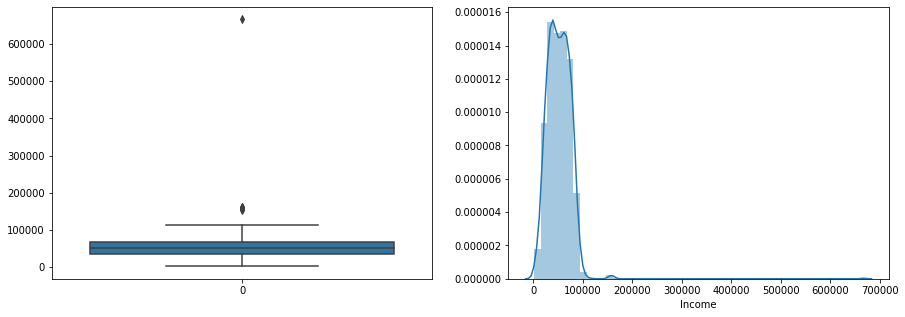

In [248]:
#checking skewness using the boxplot and histogram.
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data = df['Income'])
plt.subplot(1,2,2)
sns.distplot(df['Income'])

The distribution shows that there are a lot of outliers on the right, so we can say that the distribution is not simetrical but right skewed.

In [249]:
#Filling null values with the median value
df['Income'].fillna(df['Income'].median(), inplace = True)

### Checking if there is any duplicated value and dropping if so

In [250]:
#Dropping any column that is 100% unique values.
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Response                  2
Complain                  2
Country                   8
dtype: int64

In [251]:
df.drop(['ID'], axis=1, inplace=True)

In [252]:
print('There are {} duplicated rows.'.format(df[df.duplicated()].shape[0]))

There are 47 duplicated rows.


In [253]:
#Dropping duplicated rows and keeping the first of each duplicated row
df = df.drop_duplicates(subset = None, keep = 'first')

In [254]:
df.shape

(2193, 27)

#### Spliting the dataframe into 3 sub dataframes by the variable type (Categorical string, Categorical Numerical, Numerical) so we can analyse each variable.

In [255]:
#Using the .loc[] method to filter all the rows of the variables which is an object datatype
df_categorical = df.loc[:, df.dtypes==np.object]

In [256]:
#Spliting the categorical dataframe into "categorical numerical" and "categorical string"
cat_num = ['Kidhome', 'Teenhome', 'AcceptedCmp3',
           'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
           'AcceptedCmp2', 'Response', 'Complain']
df_cat_num = df[cat_num]

num = ['Year_Birth', 'Income',
       'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
df_num = df[num]

In [257]:
df_cat_num.head()

,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,1,0
2,0,1,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,1,0


In [258]:
df_num.head()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1970,84835.0,0,189,104,379,111,189,218,1,4,4,6,1
1,1961,57091.0,0,464,5,64,7,0,37,1,7,3,7,5
2,1958,67267.0,0,134,11,59,15,2,30,1,3,2,5,2
3,1967,32474.0,0,10,0,1,0,0,0,1,1,0,2,7
4,1989,21474.0,0,6,16,24,11,0,34,2,3,1,2,7


### Analysing Numerical Continuous variable

In [259]:
#Analysing  data Descriptive statistics
df_num.describe()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000
mean,1968.779754,52274.932969,49.125855,304.152303,26.211126,167.314181,37.437301,27.037848,44.181031,2.326037,4.095759,2.660283,5.784770,5.319197
std,11.995943,25103.187054,29.001237,336.584764,39.618627,226.628559,54.628505,41.246123,52.374568,1.928215,2.783545,2.923282,3.250099,2.424269
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35682.000000,24.000000,23.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,1970.000000,51381.500000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,1977.000000,68274.000000,74.000000,505.000000,33.000000,230.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


**Outlier removal**

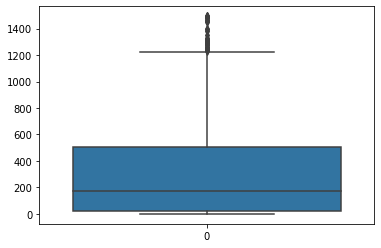

In [260]:
#Checking if there is any outliers present in the dataset
sns.boxplot(data = df_num['MntWines'])

No need to drop outliers because the amount can be increased to any level

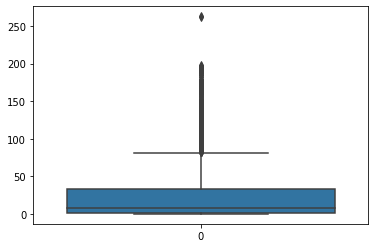

In [261]:
sns.boxplot(data = df_num['MntSweetProducts'])

No need to drop outliers because the amount can be increased to any level

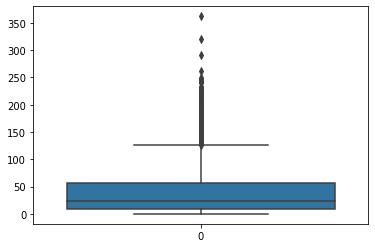

In [262]:
sns.boxplot(data = df_num['MntGoldProds'])

No need to drop outliers because the amount can be increased to any level

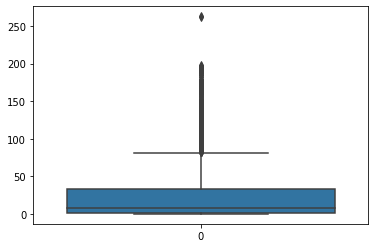

In [263]:
sns.boxplot(data = df_num['MntSweetProducts'])

No need to drop outliers because the amount can be increased to any level

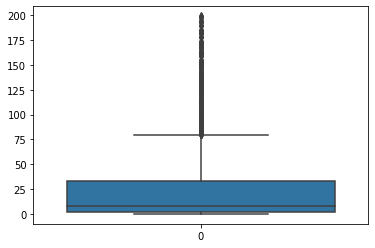

In [264]:
sns.boxplot(data = df_num['MntFruits'])

No need to drop outliers because the amount can be increased to any level

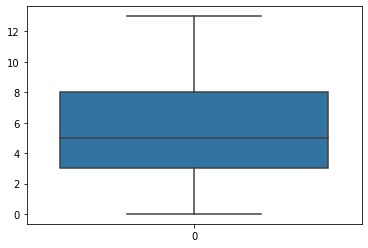

In [265]:
sns.boxplot(data = df_num['NumStorePurchases'])

No outlier detected

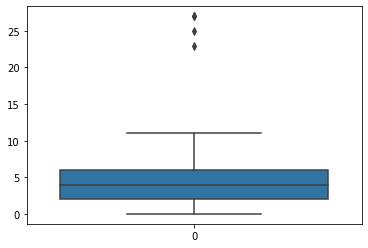

In [266]:
sns.boxplot(data = df_num['NumWebPurchases'])

Outlier detected

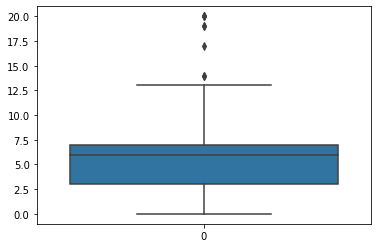

In [267]:
sns.boxplot(data = df_num['NumWebVisitsMonth'])

Outlier detected

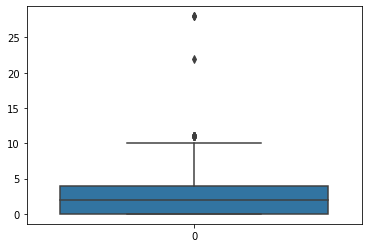

In [268]:
sns.boxplot(data = df_num['NumCatalogPurchases'])

Outlier detected

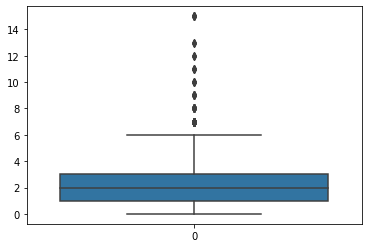

In [269]:
#NumDealsPurchases: Number of purchases made with a discount
sns.boxplot(data = df_num['NumDealsPurchases'])

Outlier detected

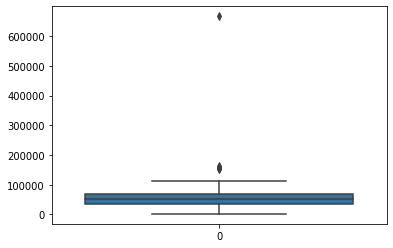

In [270]:
sns.boxplot(data = df_num['Income'])

Outlier detected

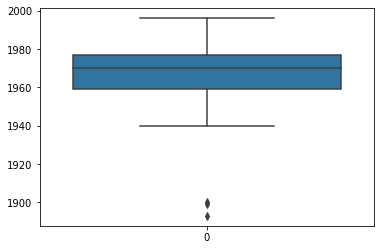

In [271]:
sns.boxplot(data = df_num['Year_Birth'])

Due to the dataset context, we need to drop it because it is not possible for a costumer to have birth year before 1900

In [272]:
Q1 = df_num['Year_Birth'].quantile(0.25)
Q3 = df_num['Year_Birth'].quantile(0.75)
IQR = Q3 - Q1
SL = Q3 + 1.5 * IQR
IL = Q1 - 1.5 * IQR
print(Q1)
print(Q3)

1959.0
1977.0


In [273]:
df_num.shape

(2193, 14)

In [274]:
#Removing the data below the inferior limit, and the data above superior limit
df_num = df_num[~(df_num['Year_Birth'] < IL) | (df_num['Year_Birth'] > SL)]

In [275]:
df_num['Year_Birth'].shape

(2190,)

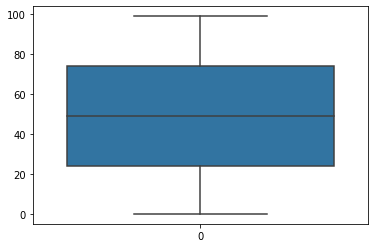

In [276]:
sns.boxplot(data = df_num['Recency'])

No outlier detected

### Histogram

Ploting a histogram for each numerical variables

<Figure size 720x360 with 0 Axes>

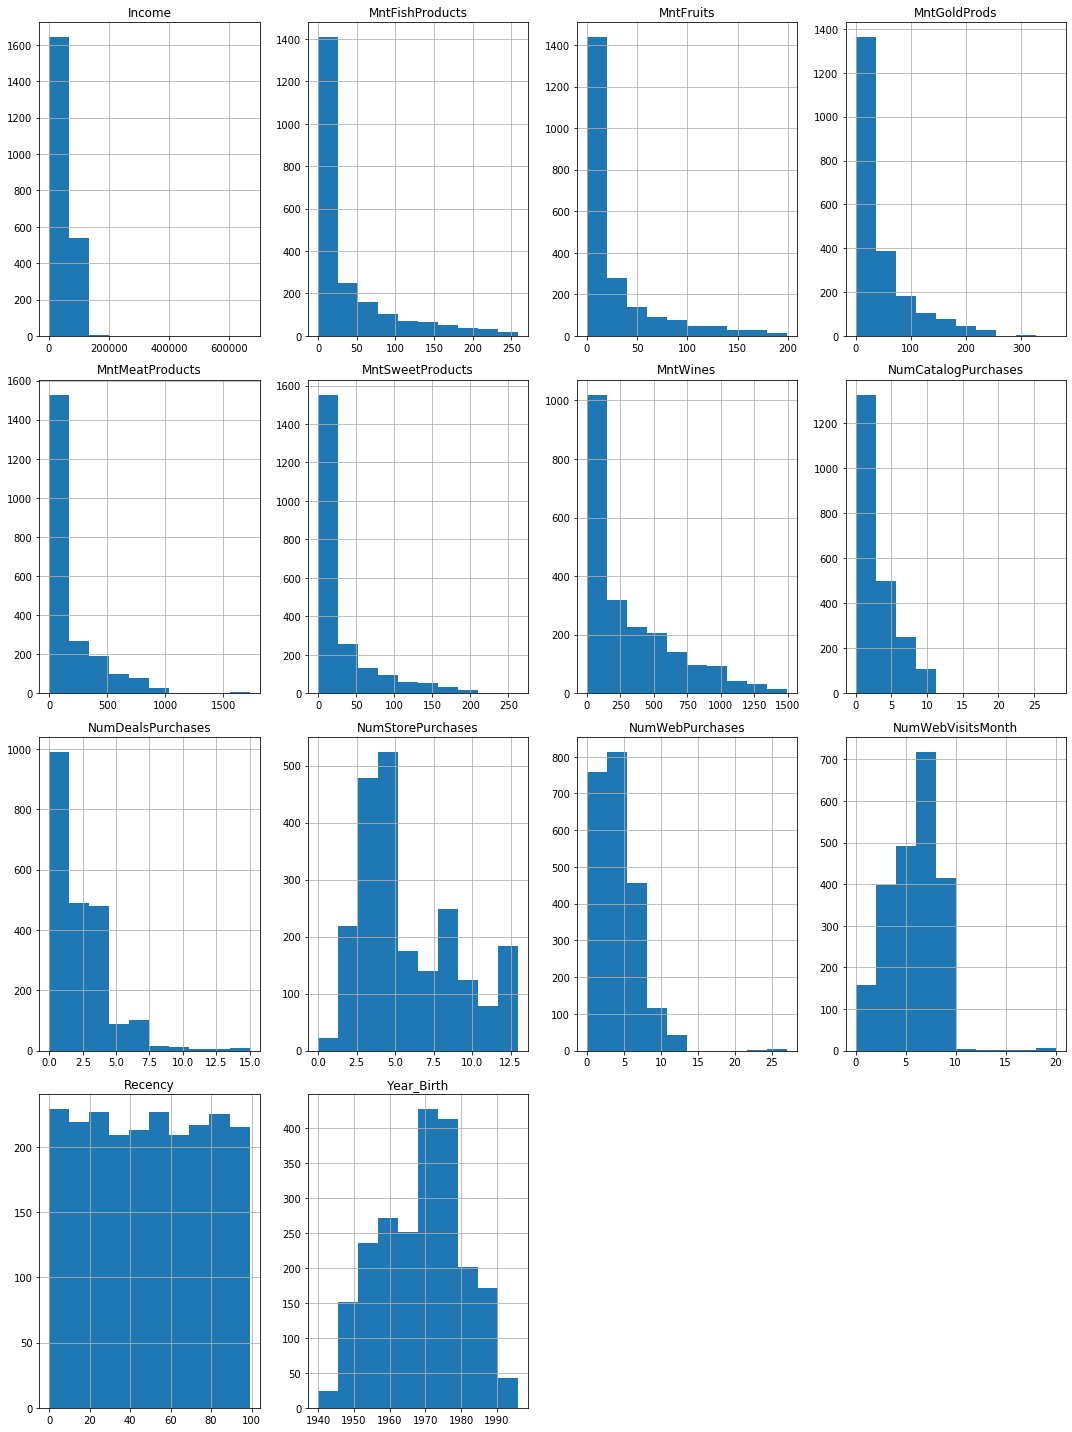

In [277]:
plt.figure(figsize=(10,5))
df_num.hist(figsize = (15,20))
plt.tight_layout()

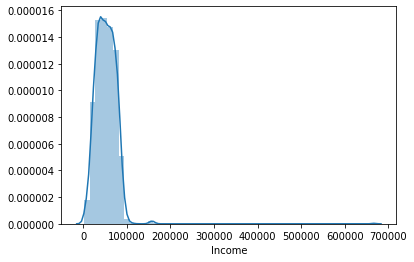

In [278]:
sns.distplot(df['Income'])

**Insight**: We have lots of clients in this store. The Income distribution plot shows that there are some customers with yearly income as high as 700k, on the other hand there are also some customers with yearly income less than 100k.

However, most of clients are with low yearly income and there are only a few which have income more than $100k. This means that  the company doesn't entertain high income people,other wise low income people have interest in the company's service.

Therefore, this outliers will be removed using log transformation.

log transformation:

In [279]:
#We use the log transformation technqiue to remove the outliers. This technique transform the current data into it respectve logrithms, deacresing the density of Y data.
df['Income'] = np.log(df['Income'])

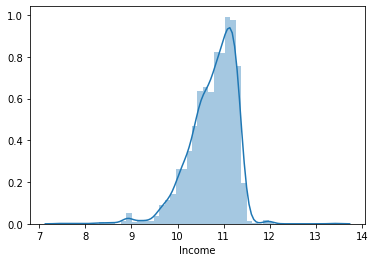

In [280]:
sns.distplot(df['Income'])

### Bivariate analysis

**Correlation**

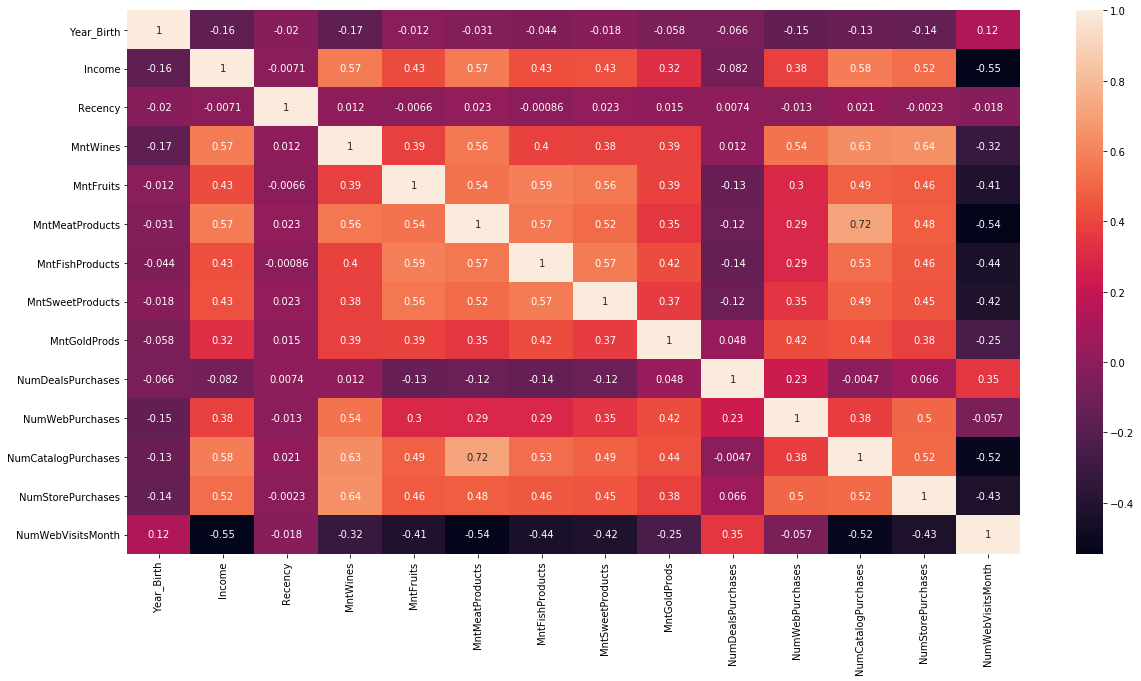

In [281]:
plt.figure(figsize=(20,10))
#annot = True activate the plot labels
sns.heatmap(df_num.corr(), annot=True)

1. **Income** Has a high positive correlation with **NumPurchases** columns and **"Mnt"** columns. This represents the high Income cluster and shows people with high income spend more and purchase more frequently. **Income** has a strong negative correlation with **NumWebVisitsMonth** suggesting that customers with high income do not for web visits too often.

2. **Amount Spent on Wines** has a high positive correlation with **NumCatalogPurchases** and **NumStorePurchases**, and similarly, **Amount Spent on Meat products** has a very high positive correlation with **NumCatalogPurchases**, suggesting that People generally buy Wines and Meat products through Catalog.

3. **NumWebVisitsMonth** shows no correlation with **NumWebPurchases**. Instead, it shows a mild correlation with **NumDealsPurchases** which suggests that giving discounts are an effective way of simulating purchases on the website.

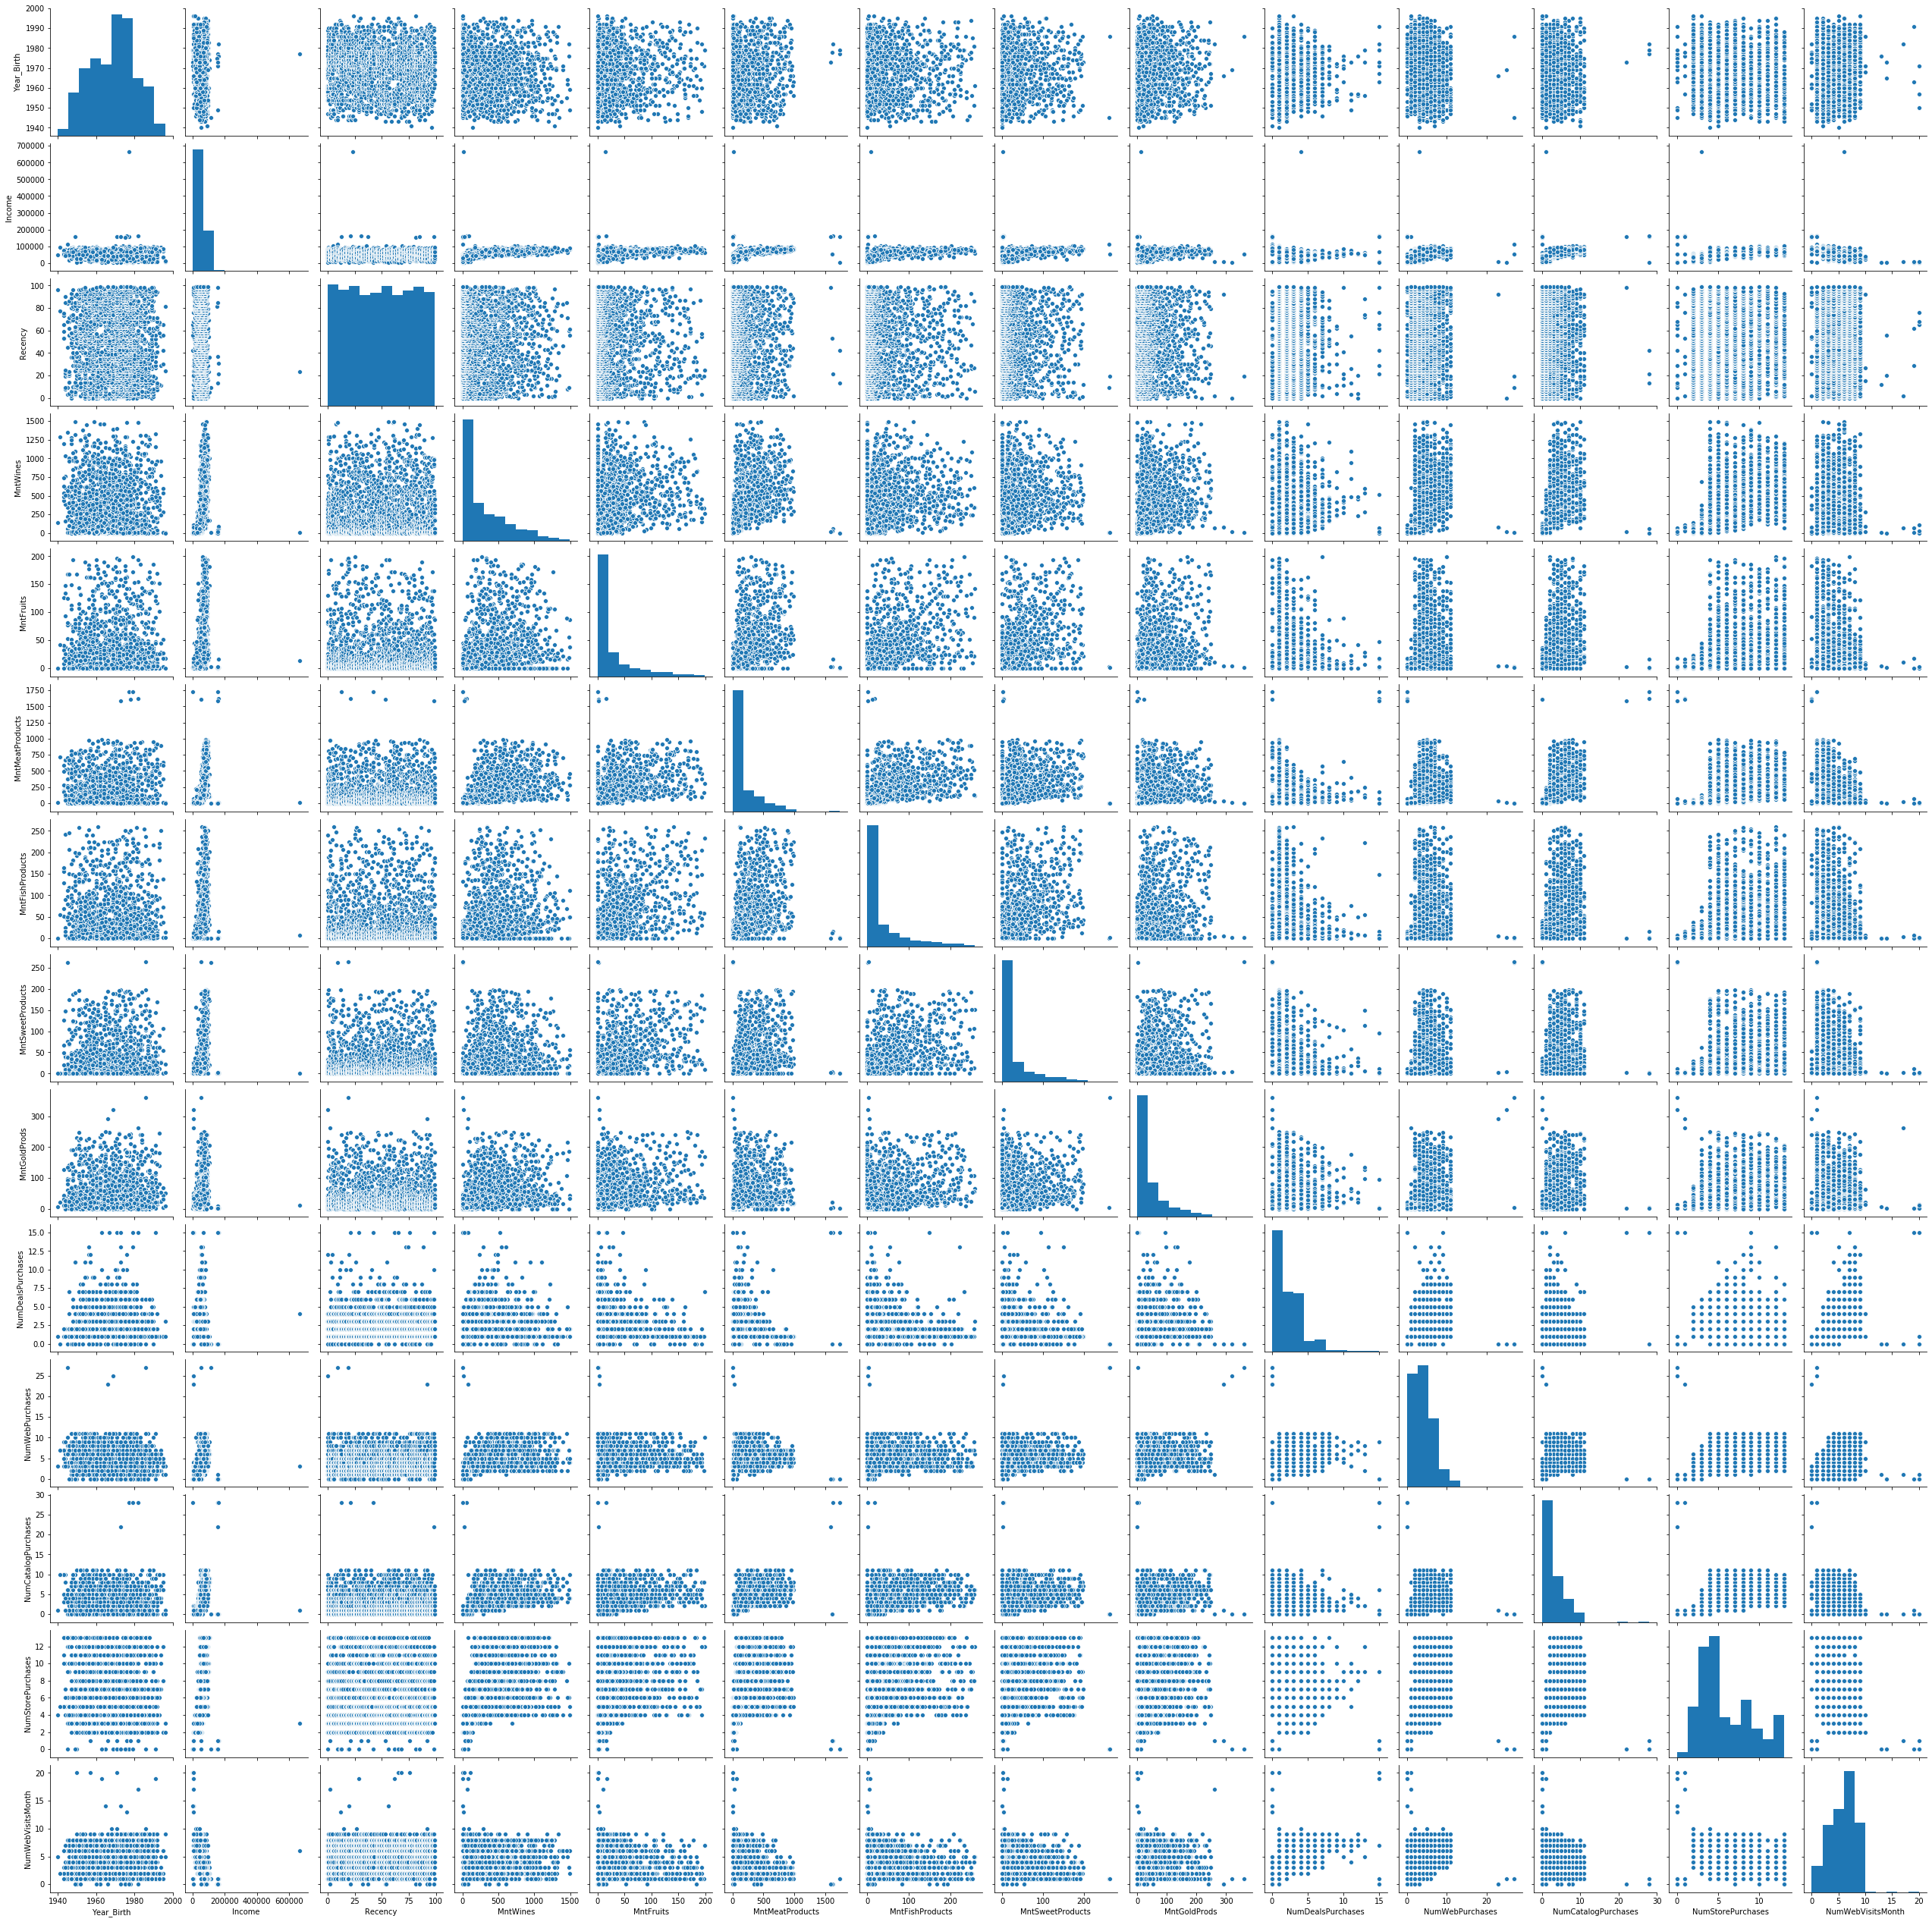

In [282]:
sns.pairplot(df_num)

### Analysis of each categorical column

Education

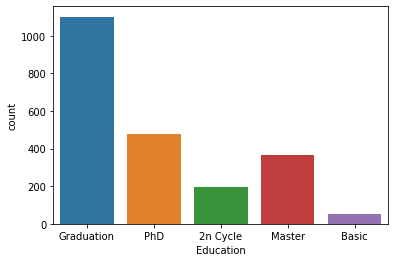

In [283]:
sns.countplot(df['Education'])

2n Cycle Education = graduate level or master's level studies

Most of the customers have completed their Graduation. Only a few of them have gone to study further after Graduation.

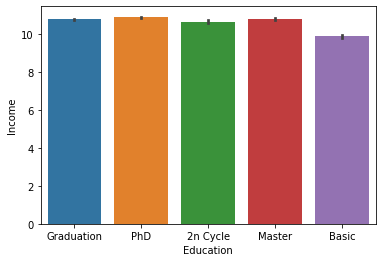

In [284]:
sns.barplot(x = df['Education'], y = df['Income'])

Customers with PhD education level have highest average income as compared to other customers.

### Marital Status

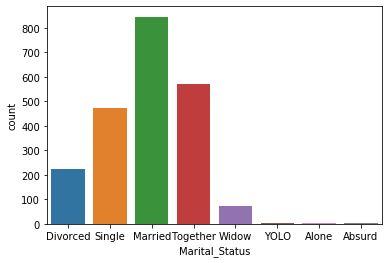

In [285]:
sns.countplot(df['Marital_Status'])

Most of customers are married.

Probably "YOLO" and "Alone" corresponds to Single category.

### Country

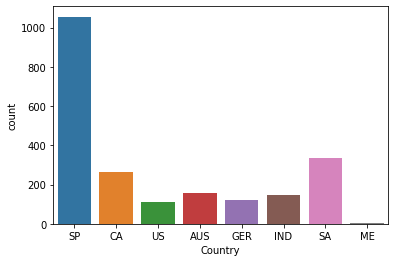

In [286]:
sns.countplot(df['Country'])

In [287]:
gp = df.groupby(by = 'Country')['Year_Birth'].mean()

In [288]:
round(gp, 2)

Country
AUS    1967.46
CA     1968.04
GER    1968.72
IND    1971.12
ME     1972.33
SA     1969.13
SP     1968.76
US     1968.37
Name: Year_Birth, dtype: float64

In [289]:
gp_income_country = df.groupby(by = 'Country')['Income'].mean()
round(gp_income_country, 2)

Country
AUS    10.76
CA     10.78
GER    10.79
IND    10.66
ME     10.95
SA     10.79
SP     10.74
US     10.77
Name: Income, dtype: float64

1. There are a lots of clients who live in Spain.
2. Mean birth year for all countries is approximately the same.
3. Average Income of customers of all countries is approximetely the same.

### Products sales mix

In [290]:
#Iterating to extract any df column name that has the sequence 'Mnt', and then appending the respective columns total to a list.
products = [col for col in df.columns if 'Mnt' in col]
products_total = []
for i in range (0, len(products)):
    print('{} = ${}'.format(products[i], df[products[i]].sum(axis=0)))
    products_total.append(df[products[i]].sum(axis=0))

MntWines = $667006
MntFruits = $57481
MntMeatProducts = $366920
MntFishProducts = $82100
MntSweetProducts = $59294
MntGoldProds = $96889


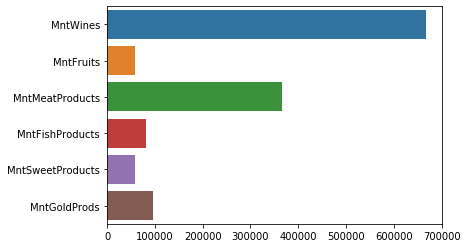

In [291]:
sns.barplot(x=products_total, y=products)

This data visualization clearly show that Wines is the product which clients spend more money, so it is the favorite product of all customers. The second favorite product is Meat. This could be a relevant information to the marketing team, so they could create campaings focussing on Wines and meats products, since these are the clients favorites, or they could even create campaings to increase less bought products.

### Purchases

In [292]:
purchases = [col for col in df.columns if 'Purchases' in col]
purchases_total = []
for i in range(0, len(purchases)):
    print('{} = {}'.format(purchases[i], df[purchases[i]].sum(axis=0)))
    purchases_total.append(df[purchases[i]].sum(axis=0))

NumDealsPurchases = 5101
NumWebPurchases = 8982
NumCatalogPurchases = 5834
NumStorePurchases = 12686


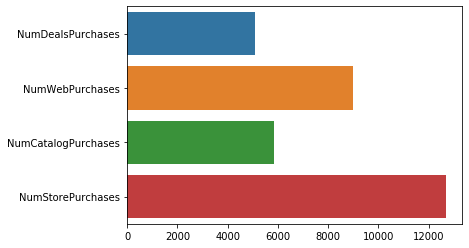

In [293]:
sns.barplot(x=purchases_total, y=purchases)

We can see that most of the purchases have been done in the physical store, and the second most relevant sales channel was the store website.

### Categorical Numerical

**Complain** data analysis

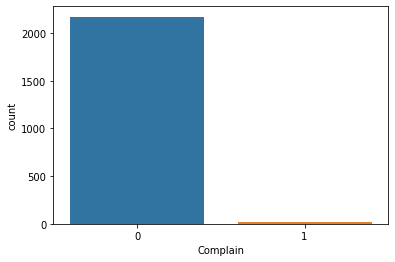

In [294]:
sns.countplot(df['Complain'])

Just a few clients have made complaints. So the company should focus on understanding why theses few people who complained, and try to solve it.

### AcceptedCmp

 If customer accepted the offer in the 1st campaign, 0 otherwise

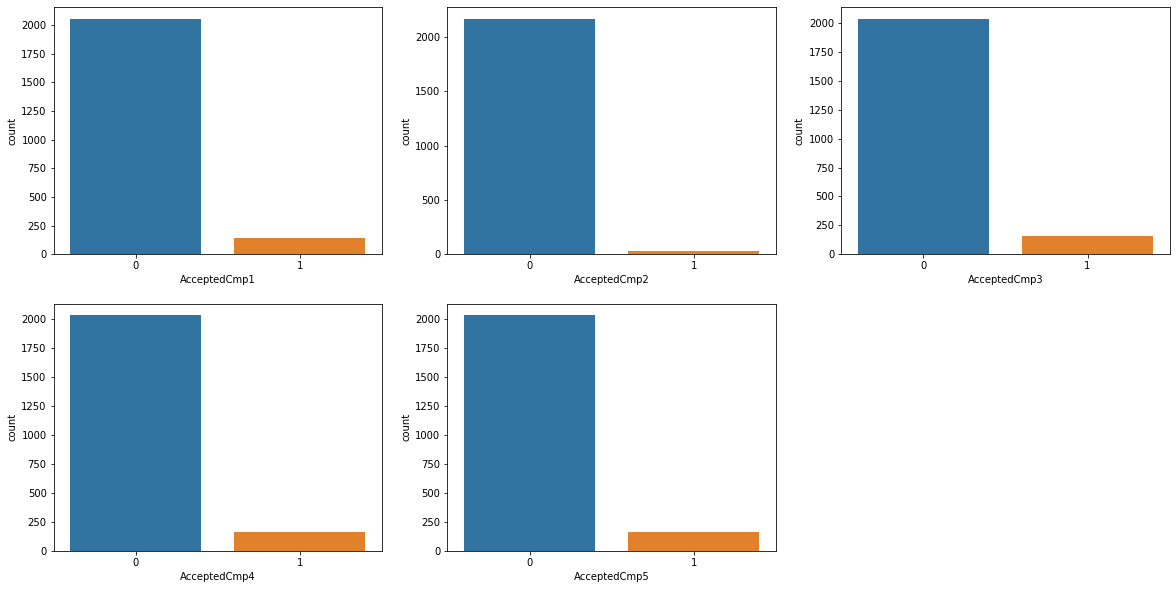

In [295]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.countplot(df['AcceptedCmp1'])
plt.subplot(2,3,2)
sns.countplot(df['AcceptedCmp2'])
plt.subplot(2,3,3)
sns.countplot(df['AcceptedCmp3'])
plt.subplot(2,3,4)
sns.countplot(df['AcceptedCmp4'])
plt.subplot(2,3,5)
sns.countplot(df['AcceptedCmp5'])

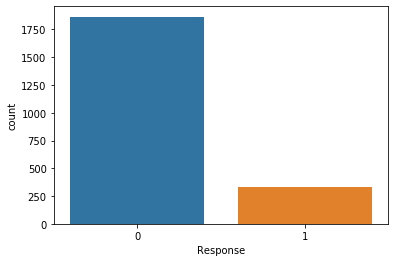

In [296]:
sns.countplot(df['Response'])

### Kidhome + teenhome

In [297]:
df2 = df.copy()
#Summing the total amount spent per client, and the the total purchases.
df2['AmountSpent'] = df[products].sum(axis=1)
df2['PurchasesMade'] = df[purchases].sum(axis=1)

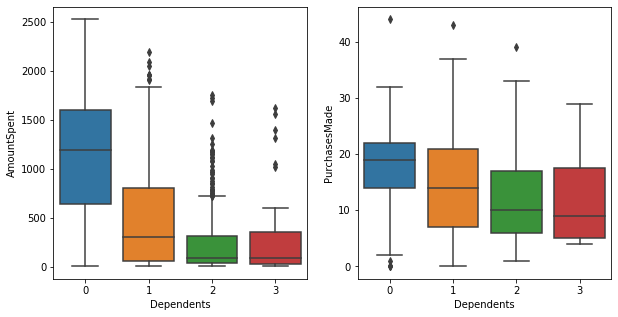

In [298]:
df2['Dependents'] = df2['Kidhome'] + df2['Teenhome']

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=df2['AmountSpent'], x=df2['Dependents'])
plt.subplot(1,2,2)
sns.boxplot(y=df2['PurchasesMade'], x=df2['Dependents'])


When compared to customers with less dependents, customers with more dependents spend less. Also, customers with more dependents make less number of purchases in the store.

### Feature Transformation

In [299]:
today = pd.to_datetime('today').date()

In [300]:
import datetime as dt
df2['Age'] = today.year - df['Year_Birth']
df2['Age_category'] = df2['Age'].apply(lambda x: 'Senior Citizen' if x >= 60 else 'Adult'\
                                      if x > 25 else 'Youth')

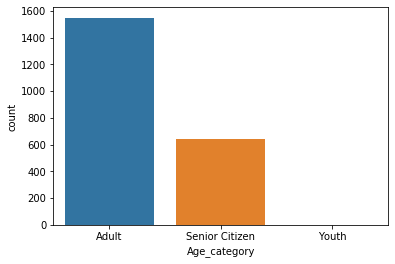

In [301]:
sns.countplot(x=df2['Age_category'])

So we have most of the customers in the age group 25 to 60

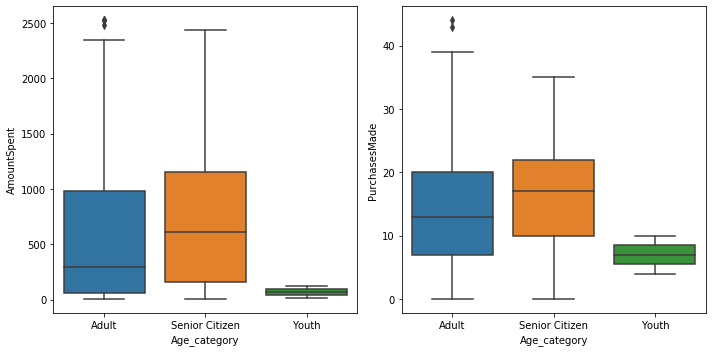

In [302]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y = df2['AmountSpent'], x=df2['Age_category'])
plt.subplot(1,2,2)
sns.boxplot(y = df2['PurchasesMade'], x = df2['Age_category'])
plt.tight_layout()

Senior citizens are making more purchases and spending more as compared to Adults